# Start

## Loading necessary tools

In [ ]:
pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install brainweb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Image preparation

In [ ]:
import nibabel as nib
img = nib.load('/content/phantom_1.0mm_normal_crisp.mnc')
data = img.get_fdata()


In [ ]:
img


In [ ]:
print(img)

<class 'nibabel.minc1.Minc1Image'>
data shape (181, 217, 181)
affine: 
[[   0.    0.    1.  -90.]
 [   0.    1.    0. -126.]
 [   1.    0.    0.  -72.]
 [   0.    0.    0.    1.]]
metadata:


In [ ]:
affine = img.affine

In [ ]:
data.dtype

dtype('float64')

In [ ]:
data.shape

(181, 217, 181)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data[:, 100, :].T
# array shows 5, 6 and 0s these are the tissue labels.

array([[5., 6., 6., ..., 0., 0., 0.],
       [5., 5., 6., ..., 0., 0., 0.],
       [5., 5., 5., ..., 0., 0., 0.],
       ...,
       [5., 5., 6., ..., 0., 0., 0.],
       [5., 5., 6., ..., 0., 0., 0.],
       [5., 6., 6., ..., 0., 0., 0.]])

In [ ]:
from brainweb import volshow
import numpy as np


## Understanding slices and image

(217, 181)


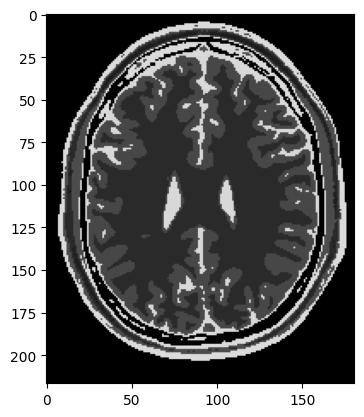

In [ ]:
# T1-mask
img_slice = np.rot90( data[100,:,:].T )
# since the image is rotated to x direction we make it to y direction.

plt.imshow(img_slice, cmap='gray_r')

msk_csf = img_slice==2 # here making a mask for different labels

plt.imshow(msk_csf)

T1_map = np.zeros(img_slice.shape)

T1_map.shape
# 0 10 np.where(a < 5, a, 1300*a)
msk_csf = np.where(img_slice == 1)
T1_map[img_slice == 0] = 0
T1_map[img_slice == 1] =2539 # slices where the image is CSF 
T1_map[img_slice == 2] = 833 # slices where the image is Grey matter
T1_map[img_slice == 3] = 500 # White Matter
T1_map[img_slice == 4] = 350 # FAT
T1_map[img_slice == 5] = 900 # muscle/skin
T1_map[img_slice == 6] = 2569 # skin
T1_map[img_slice == 7] = 0 # skull
T1_map[img_slice == 8] = 833 # glial matter
T1_map[img_slice == 9] = 500 # meat
T1_map[img_slice == 10] = 752 # MS Lesion
#T1_map[msk_csf[0][0]][msk_csf[1][0]] = 2539

print(T1_map.shape)
plt.imshow(T1_map, vmin=0, vmax=3000, cmap = "gray")


(217, 181)


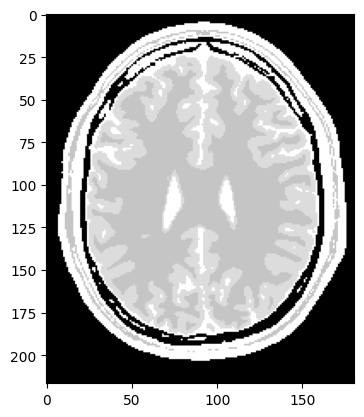

In [ ]:
# T-PD-mask
img_slice = np.rot90( data[100,:,:].T )
# since the image is rotated to x direction we make it to y direction.

plt.imshow(img_slice, cmap='gray_r')

msk_csf = img_slice==2 # here making a mask for different labels

plt.imshow(msk_csf)

T_map_pd = np.zeros(img_slice.shape)

T_map_pd.shape
# 0 10 np.where(a < 5, a, 1300*a)
msk_csf = np.where(img_slice == 1)
T_map_pd[img_slice == 0] = 0
T_map_pd[img_slice == 1] = 1 # slices where the image is CSF 
T_map_pd[img_slice == 2] = 0.86 # slices where the image is Grey matter
T_map_pd[img_slice == 3] = 0.770 # White Matter
T_map_pd[img_slice == 4] = 1 # FAT
T_map_pd[img_slice == 5] = 1 # muscle/skin
T_map_pd[img_slice == 6] = 1 # skin
T_map_pd[img_slice == 7] = 0 # skull
T_map_pd[img_slice == 8] = 0.860 # glial matter
T_map_pd[img_slice == 9] = 0.770 # meat
T_map_pd[img_slice == 10] = 0.760 # MS Lesion

print(T_map_pd.shape)
plt.imshow(T_map_pd, vmin=0, vmax=1, cmap = "gray")

In [ ]:
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T1-weighted so in Z-dir
params_TE = 20 # echo neglect here.
params_TR = 600 # Repetition
#k*rho = PD so apply pd to formula for T1W
T1_w = np.zeros(img_slice.shape)

T1_w[img_slice == 0] = T_map_pd[img_slice == 0]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 0]))) #0
T1_w[img_slice == 1] = T_map_pd[img_slice == 1]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 1]))) #1
T1_w[img_slice == 2] = T_map_pd[img_slice == 2]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 2]))) #2

T1_w[img_slice == 3] = T_map_pd[img_slice == 3]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 3]))) #3
T1_w[img_slice == 4] = T_map_pd[img_slice == 4]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 4]))) #4
T1_w[img_slice == 5] = T_map_pd[img_slice == 5]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 5]))) #5

T1_w[img_slice == 6] = T_map_pd[img_slice == 6]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 6]))) #6
T1_w[img_slice == 7] = T_map_pd[img_slice == 7]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 7]))) #7
T1_w[img_slice == 8] = T_map_pd[img_slice == 8]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 8]))) #8

T1_w[img_slice == 9] = T_map_pd[img_slice == 9]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 9]))) #9
T1_w[img_slice == 10] = T_map_pd[img_slice == 10]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 10]))) #9

<ipython-input-14-b15c808a0d47>:16: RuntimeWarning: divide by zero encountered in true_divide
  T1_w[img_slice == 0] = T_map_pd[img_slice == 0]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 0]))) #0
<ipython-input-14-b15c808a0d47>:25: RuntimeWarning: divide by zero encountered in true_divide
  T1_w[img_slice == 7] = T_map_pd[img_slice == 7]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 7]))) #7


(217, 181)


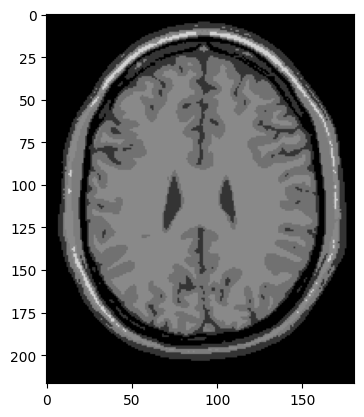

In [ ]:
print(T1_w.shape)
plt.imshow(T1_w, vmin=0, vmax=1, cmap = "gray")

(217, 181)


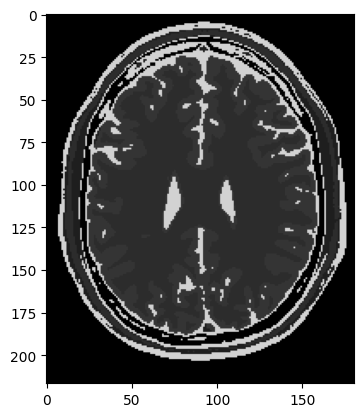

In [ ]:
# T2-mask
img_slice = np.rot90( data[100,:,:].T )
# since the image is rotated to x direction we make it to y direction.

#plt.imshow(img_slice, cmap='gray_r')

#msk_csf = img_slice==2 # here making a mask for different labels

#plt.imshow(msk_csf)

T2_map = np.zeros(img_slice.shape)

T2_map.shape
# 0 10 np.where(a < 5, a, 1300*a)
#msk_csf = np.where(img_slice == 1)
T2_map[img_slice == 0] = 0
T2_map[img_slice == 1] = 329 # slices where the image is CSF 
T2_map[img_slice == 2] = 83 # slices where the image is Grey matter
T2_map[img_slice == 3] = 70 # White Matter
T2_map[img_slice == 4] = 70 # FAT
T2_map[img_slice == 5] = 47 # muscle/skin
T2_map[img_slice == 6] = 329 # skin
T2_map[img_slice == 7] = 0 # skull
T2_map[img_slice == 8] = 83 # glial matter
T2_map[img_slice == 9] = 70 # meat
T2_map[img_slice == 10] = 237 # MS Lesion


print(T2_map.shape)
plt.imshow(T2_map, vmin=0, vmax=400, cmap = "gray")


In [ ]:
#T2-w mapping
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T1-weighted so in Z-dir
params_TE = 80 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T1W
T2_w = np.zeros(img_slice.shape)

T2_w[img_slice == 0] = T_map_pd[img_slice == 0]*(np.exp(-(params_TE)/(T2_map[img_slice == 0]))) #0
T2_w[img_slice == 1] = T_map_pd[img_slice == 1]*(np.exp(-(params_TE)/(T2_map[img_slice == 1]))) #1
T2_w[img_slice == 2] = T_map_pd[img_slice == 2]*(np.exp(-(params_TE)/(T2_map[img_slice == 2]))) #2

T2_w[img_slice == 3] = T_map_pd[img_slice == 3]*(np.exp(-(params_TE)/(T2_map[img_slice == 3]))) #3
T2_w[img_slice == 4] = T_map_pd[img_slice == 4]*(np.exp(-(params_TE)/(T2_map[img_slice == 4]))) #4
T2_w[img_slice == 5] = T_map_pd[img_slice == 5]*(np.exp(-(params_TE)/(T2_map[img_slice == 5]))) #5

T2_w[img_slice == 6] = T_map_pd[img_slice == 6]*(np.exp(-(params_TE)/(T2_map[img_slice == 6]))) #6
T2_w[img_slice == 7] = T_map_pd[img_slice == 7]*(np.exp(-(params_TE)/(T2_map[img_slice == 7]))) #7
T2_w[img_slice == 8] = T_map_pd[img_slice == 8]*(np.exp(-(params_TE)/(T2_map[img_slice == 8]))) #8

T2_w[img_slice == 9] = T_map_pd[img_slice == 9]*(np.exp(-(params_TE)/(T2_map[img_slice == 9]))) #9
T2_w[img_slice == 10] = T_map_pd[img_slice == 10]*(np.exp(-(params_TE)/(T2_map[img_slice == 10]))) #9

<ipython-input-17-80452181fe27>:17: RuntimeWarning: divide by zero encountered in true_divide
  T2_w[img_slice == 0] = T_map_pd[img_slice == 0]*(np.exp(-(params_TE)/(T2_map[img_slice == 0]))) #0
<ipython-input-17-80452181fe27>:26: RuntimeWarning: divide by zero encountered in true_divide
  T2_w[img_slice == 7] = T_map_pd[img_slice == 7]*(np.exp(-(params_TE)/(T2_map[img_slice == 7]))) #7


(217, 181)


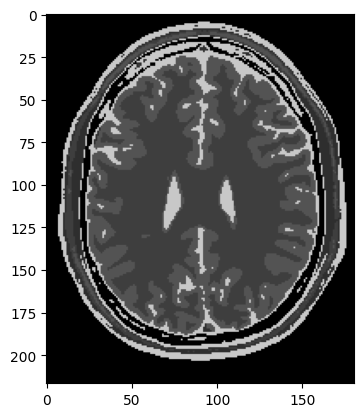

In [ ]:
print(T2_w.shape)
plt.imshow(T2_w, vmin=0, vmax=1, cmap = "gray")

In [ ]:
# Inversion recovery DIR (Double Inversion recovery) weight
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for dir-pd-weighted so in Z-dir
params_TI1 = 2208 # inversion time for time between 180 dec inv pulse to 90 pulse for T1
params_TI2 = 545 # inv time for time between 180 dec inv pulse to 90 pulse for T2
params_TE = 80 # echo neglect here.
params_TR = 66700 # Repetition
#k*rho = PD so apply pd to formula for T1W
PD_dir_w = np.zeros(img_slice.shape)

for i in range(0,11,1):
  PD_dir_w[img_slice == i] = T_map_pd[img_slice == i]*(1-2*np.exp(-(params_TI2)/(T1_map[img_slice == i])) + 
                                                     2*np.exp(-(params_TI1+params_TI2)/T1_map[img_slice == i]) -
                                                     np.exp(-params_TR/T1_map[img_slice == i]))*np.exp(-params_TE/T2_map[img_slice == i]) #i
# multiplied by 10 to make the image brighter.

<ipython-input-19-2caa77cf0545>:22: RuntimeWarning: divide by zero encountered in true_divide
  PD_dir_w[img_slice == i] = T_map_pd[img_slice == i]*(1-2*np.exp(-(params_TI2)/(T1_map[img_slice == i])) +
<ipython-input-19-2caa77cf0545>:23: RuntimeWarning: divide by zero encountered in true_divide
  2*np.exp(-(params_TI1+params_TI2)/T1_map[img_slice == i]) -
<ipython-input-19-2caa77cf0545>:24: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-params_TR/T1_map[img_slice == i]))*np.exp(-params_TE/T2_map[img_slice == i]) #i


In [ ]:
np.array(PD_dir_w).shape

(217, 181)

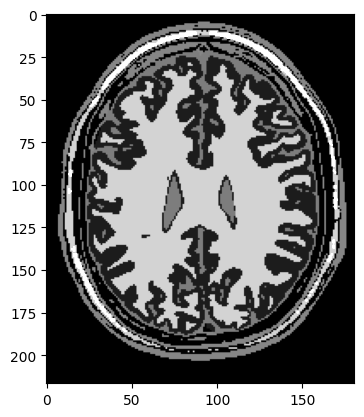

In [ ]:
plt.imshow(PD_dir_w, vmin = 0, vmax = 0.1, cmap = 'gray')

# Masks

## T1 mask

(217, 181)


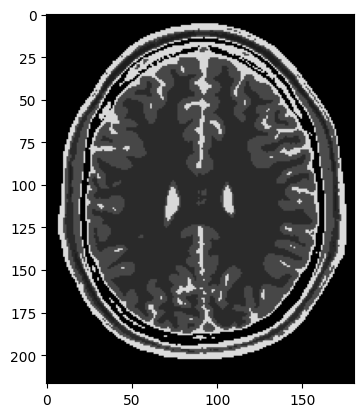

In [ ]:
# T1-mask-for-all-axial
img_slice = np.rot90( data[100,:,:].T )
img_slice_array = []
T1_map_array = []
T1_map_zeros = np.zeros(img_slice.shape)
# since the image is rotated to x direction we make it to y direction.

for i in range(len(data[:,1,1].T)):
  img_slice_array.append(np.rot90(data[i,:,:].T))

for i in range(len(img_slice_array)):
  T1_map_zeros[img_slice_array[i] == 0] = 0 # background
  T1_map_zeros[img_slice_array[i] == 1] = 2539 # CSF
  T1_map_zeros[img_slice_array[i] == 2] = 833 # gray matter
  T1_map_zeros[img_slice_array[i] == 3] = 500 # White Matter 
  T1_map_zeros[img_slice_array[i] == 4] = 350 # FAT
  T1_map_zeros[img_slice_array[i] == 5] = 900 # muscle/skin
  T1_map_zeros[img_slice_array[i] == 6] = 2569 # skin
  T1_map_zeros[img_slice_array[i] == 7] = 0 # skull
  T1_map_zeros[img_slice_array[i] == 8] = 833 # glial matter
  T1_map_zeros[img_slice_array[i] == 9] = 500 # meat
  T1_map_zeros[img_slice_array[i] == 10] = 752 # MS lesion
  T1_map_array.append(T1_map_zeros)
  T1_map_zeros = np.zeros(img_slice.shape)


print(T1_map_array[101].shape)
plt.imshow(T1_map_array[101], vmin=0, vmax=3000, cmap = "gray")

## T2 mask

(217, 181)


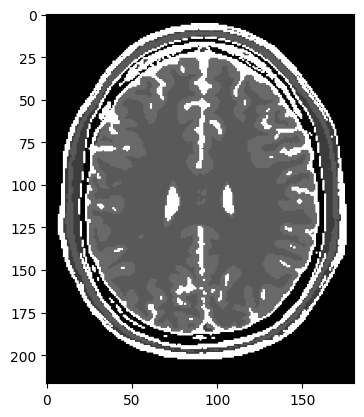

In [ ]:
# T2-mask-all-axial
#img_slice = np.rot90( data[100,:,:].T )
img_slice_array = []
T2_map_array = []
T2_map_zeros = np.zeros(img_slice.shape)
# since the image is rotated to x direction we make it to y direction.

for i in range(len(data[:,1,1].T)):
  img_slice_array.append(np.rot90(data[i,:,:].T))

for i in range(len(img_slice_array)):
  T2_map_zeros[img_slice_array[i] == 0] = 0 # background
  T2_map_zeros[img_slice_array[i] == 1] = 329 # CSF
  T2_map_zeros[img_slice_array[i] == 2] = 83 # gray matter
  T2_map_zeros[img_slice_array[i] == 3] = 70 # White Matter 
  T2_map_zeros[img_slice_array[i] == 4] = 70 # FAT
  T2_map_zeros[img_slice_array[i] == 5] = 47 # muscle/skin
  T2_map_zeros[img_slice_array[i] == 6] = 329 # skin
  T2_map_zeros[img_slice_array[i] == 7] = 0 # skull
  T2_map_zeros[img_slice_array[i] == 8] = 83 # glial matter
  T2_map_zeros[img_slice_array[i] == 9] = 70 # meat
  T2_map_zeros[img_slice_array[i] == 10] = 237 # MS lesion
  T2_map_array.append(T2_map_zeros)
  T2_map_zeros = np.zeros(img_slice.shape)

print(T2_map_array[101].shape)
plt.imshow(T2_map_array[101], vmin=0, vmax=200, cmap = "gray") # T2 is not that bright ask what can be done to improve.

## PD mask

(217, 181)


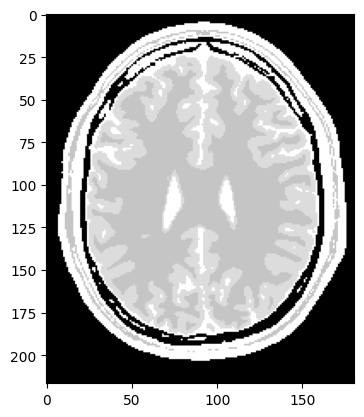

In [ ]:
# T-PD-mask-all-axial
img_slice = np.rot90( data[100,:,:].T )
img_slice_array = []
pd_map_array = []
pd_map_zeros = np.zeros(img_slice.shape)
# since the image is rotated to x direction we make it to y direction.

for i in range(len(data[:,1,1].T)):
  img_slice_array.append(np.rot90(data[i,:,:].T))

for i in range(len(img_slice_array)):
  pd_map_zeros[img_slice_array[i] == 0] = 0 # background
  pd_map_zeros[img_slice_array[i] == 1] = 1 # CSF
  pd_map_zeros[img_slice_array[i] == 2] = 0.86 # gray matter
  pd_map_zeros[img_slice_array[i] == 3] = 0.77 # White Matter 
  pd_map_zeros[img_slice_array[i] == 4] = 1 # FAT
  pd_map_zeros[img_slice_array[i] == 5] = 1 # muscle/skin
  pd_map_zeros[img_slice_array[i] == 6] = 1 # skin
  pd_map_zeros[img_slice_array[i] == 7] = 0 # skull
  pd_map_zeros[img_slice_array[i] == 8] = 0.86 # glial matter
  pd_map_zeros[img_slice_array[i] == 9] = 0.77 # meat
  pd_map_zeros[img_slice_array[i] == 10] = 0.76 # MS lesion
  pd_map_array.append(pd_map_zeros)
  pd_map_zeros = np.zeros(img_slice.shape)

print(pd_map_array[100].shape)
plt.imshow(pd_map_array[100], vmin=0, vmax=1, cmap = "gray")

## Saving files

In [ ]:
# saving masks to files.
from PIL import Image as im
import os

image_path = "/content/pd"
os.mkdir(image_path)

In [ ]:
# pd mask
for i in range(len(pd_map_array)):
  plt.imsave('/content/pd/' + "pd" + str(i) + ".png", pd_map_array[i], cmap = "gray")

In [ ]:
# t1 mask
image_path_t1 = "/content/t1"
os.mkdir(image_path_t1)

In [ ]:
for i in range(len(T1_map_array)):
  plt.imsave('/content/t1/' + "t1" + str(i)  + ".png", T1_map_array[i], cmap = "gray")

In [ ]:
# t2 mask
image_path_t2 = "/content/t2"
os.mkdir(image_path_t2)

In [ ]:
for i in range(len(T2_map_array)):
  plt.imsave('/content/t2/'+ "t2" + str(i)  + ".png", T2_map_array[i], cmap = "gray")

# Weighted image arrays

Now weighted images for all.

## T1

In [ ]:
# for all slices T1-w
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T1-weighted so in Z-dir
params_TE = 50 # echo neglect here.
params_TR = 6670 # Repetition
#k*rho = PD so apply pd to formula for T1W
T1_w_array = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T1_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))

#T1_w_array = np.transpose(T1_w_array, (1, 2, 3, 0))

<ipython-input-31-9381d2be4379>:19: RuntimeWarning: divide by zero encountered in true_divide
  T1_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# Find the maximum value of the array
max_val_t1 = np.amax(T1_w_array)

In [ ]:
max_val_t1

0.9999999947083877

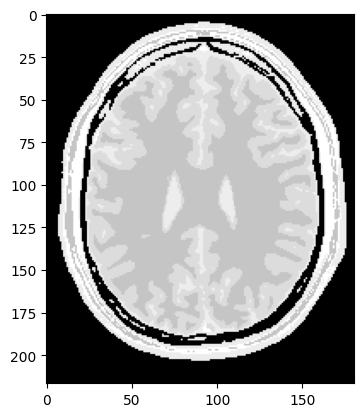

In [ ]:
plt.imshow(T1_w_array[100,:,:], vmin = 0, vmax = max_val_t1, cmap = "gray")

## T2

In [ ]:
# for all slices T2-w
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T2-weighted so in Z-dir
params_TE = 50 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1])))

#T2_w_array = np.transpose(T2_w_array, (1, 2, 3, 0))

<ipython-input-35-42edd7da6481>:19: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# Find the maximum value of the array
max_val = np.amax(T2_w_array)

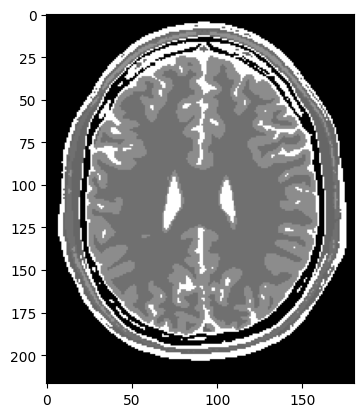

In [ ]:
plt.imshow(T2_w_array[100,:,:], vmin = 0, vmax = max_val, cmap = "gray")

## DIR

In [ ]:
# Inversion recovery DIR (Double Inversion recovery) weight - all- slices
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for dir-pd-weighted so in Z-dir
params_TI1 = 2215 #np.arange(2200,2230,3) inversion time for time between 180 dec inv pulse to 90 pulse for T1
params_TI2 = 545 #np.arange(530,560,3) inv time for time between 180 dec inv pulse to 90 pulse for T2
params_TE = 80 #np.arange(10,150,14) echo neglect here.
params_TR = 6670  # np.arange(6600,6740,14) Repetition
PD_dir_w_x = np.zeros(img.shape)  #np.zeros((max(len(params_TR), len(params_TE), len(params_TI1), len(params_TI2)),) + img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    PD_dir_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-2*np.exp(-(params_TI2)/(T1_map_array[i][img_slice_array[i] == i1])) + 
                                                     2*np.exp(-(params_TI1+params_TI2)/T1_map_array[i][img_slice_array[i] == i1]) -
                                                     np.exp(-params_TR/T1_map_array[i][img_slice_array[i] == i1]))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i
#PD_dir_w_x = np.transpose(PD_dir_w_x, (1, 2, 3, 0))
#PD_dir_w_x = np.concatenate(np.split(PD_dir_w_x, len(PD_dir_w_x[0,0,0]), axis=3), axis=0)

<ipython-input-38-0db68d1d2ff0>:22: RuntimeWarning: divide by zero encountered in true_divide
  PD_dir_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-2*np.exp(-(params_TI2)/(T1_map_array[i][img_slice_array[i] == i1])) +
<ipython-input-38-0db68d1d2ff0>:23: RuntimeWarning: divide by zero encountered in true_divide
  2*np.exp(-(params_TI1+params_TI2)/T1_map_array[i][img_slice_array[i] == i1]) -
<ipython-input-38-0db68d1d2ff0>:24: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-params_TR/T1_map_array[i][img_slice_array[i] == i1]))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i


In [ ]:
# Find the maximum value of the array
max_dir = np.amax(PD_dir_w_x)

In [ ]:
max_dir

0.18473539756636667

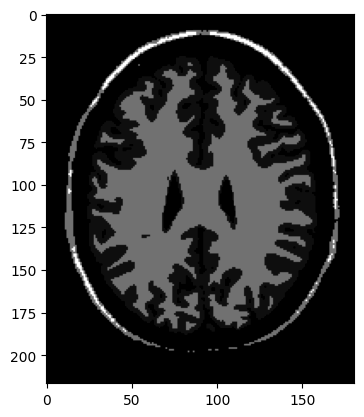

In [ ]:
plt.imshow(PD_dir_w_x[100,:,:], vmin = 0, vmax = max_dir, cmap = "gray")

## Flair T2w

In [ ]:
# FLuid Attenuated inversion recovery (FLAIR) T2wi weight - all- slices
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for flair-weighted so in Z-dir
params_TI = 2085 #np.arange(2040, 2130, 9) inversion time for time between 180 dec inv pulse to 90 pulse for T1
params_Tsat = 1400 #np.arange(1385, 1415, 3)  inv time for time between 180 dec inv pulse to 90 pulse for T2
params_TE = 90 #np.arange(20,160,14)  echo neglect here.
Flair_w_x = np.zeros(img.shape) #np.zeros((max(len(params_Tsat), len(params_TE), len(params_TI)),) + img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    Flair_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*np.exp(-params_Tsat/T1_map_array[i][img_slice_array[i] == i1])*(1-2*np.exp(-(params_TI)/(T1_map_array[i][img_slice_array[i] == i1])))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i

#Flair_w_x = np.transpose(Flair_w_x, (1, 2, 3, 0))
#Flair_w_x = np.concatenate(np.split(Flair_w_x, len(Flair_w_x[0,0,0]), axis=3), axis=0)

<ipython-input-42-f2c1df13aa89>:21: RuntimeWarning: divide by zero encountered in true_divide
  Flair_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*np.exp(-params_Tsat/T1_map_array[i][img_slice_array[i] == i1])*(1-2*np.exp(-(params_TI)/(T1_map_array[i][img_slice_array[i] == i1])))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i


In [ ]:
# Find the maximum value of the array
max_flair = np.amax(Flair_w_x)

In [ ]:
max_flair

0.05267115017609241

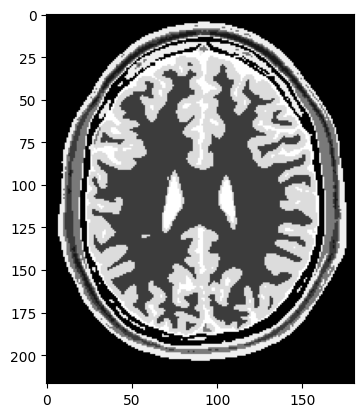

In [ ]:
plt.imshow(Flair_w_x[100,:,:], vmin = 0, vmax = max_flair, cmap = "gray")

## FSE T2wi

In [ ]:
# Fast Spin Echo (FSE) T2wi weight - all- slices
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for FSE-weighted so in Z-dir
params_TR = 7200 #np.arange(6000,8800,280)
params_TE = 80 #np.arange(10,150,14)
FSE_w_x = np.zeros(img.shape) #np.zeros((max(len(params_TR), len(params_TE)),) + img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    FSE_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1]))) #i

#FSE_w_x = np.transpose(FSE_w_x, (1, 2, 3, 0))
#FSE_w_x = np.concatenate(np.split(FSE_w_x, len(FSE_w_x[0,0,0]), axis=3), axis=0)

<ipython-input-46-12a1b500369e>:20: RuntimeWarning: divide by zero encountered in true_divide
  FSE_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1]))) #i


In [ ]:
# Find the maximum value of the array
max_fse = np.amax(FSE_w_x)

In [ ]:
max_fse

0.7381364103483031

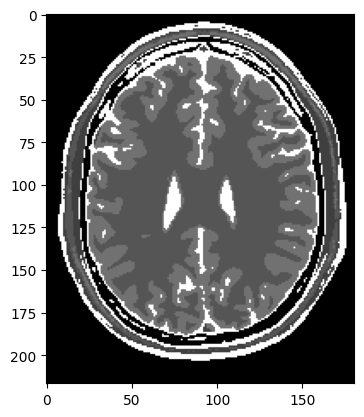

In [ ]:
plt.imshow(FSE_w_x[100,:,:], vmin = 0, vmax = max_fse, cmap = "gray")

# Saving files

### PNG save

In [ ]:
# saving weighted images to files.
from PIL import Image as im
import os

image_path = "/content/pd_w"
os.mkdir(image_path)

In [ ]:
# pd weighted
for i in range(len(PD_dir_w_x)):
  plt.imsave('/content/pd_w/' + "pd_w " + str(i) + ".png", PD_dir_w_x[i], cmap = "gray")

In [ ]:
image_path = "/content/T1_w"
os.mkdir(image_path)

In [ ]:
# T1 weighted
for i in range(len(T1_w_array)):
  plt.imsave('/content/T1_w/' + "T1_w " + str(i) + ".png", T1_w_array[i], cmap = "gray")

In [ ]:
image_path = "/content/T2_w"
os.mkdir(image_path)

In [ ]:
# T2 weighted
for i in range(len(T2_w_array)):
  plt.imsave('/content/T2_w/' + "T2_w " + str(i) + ".png", T2_w_array[i], cmap = "gray")

### Alternative saving better NIFTI

In [ ]:
DIR_image = nib.Nifti1Image(PD_dir_w_x, affine=np.eye(4))

In [ ]:
nib.save(DIR_image, os.path.join('/content/', 
'DIR.nii.gz'))

In [ ]:
"""
image_path = "/content/train"
os.mkdir(image_path)

"""

'\nimage_path = "/content/train"\nos.mkdir(image_path)\n\n'

In [ ]:
"""
for i in range(1):
  nib.save(nib.Nifti1Image(FSE_w_x,affine = np.eye(4)), os.path.join('/content/train',f'FSE_{i}.nii.gz'))
"""

"\nfor i in range(1):\n  nib.save(nib.Nifti1Image(FSE_w_x,affine = np.eye(4)), os.path.join('/content/train',f'FSE_{i}.nii.gz'))\n"

In [ ]:
"""

for i in range(1):
  nib.save(nib.Nifti1Image(PD_dir_w_x,affine = np.eye(4)), os.path.join('/content/train',f'DIR_{i}.nii.gz'))
"""

"\n\nfor i in range(1):\n  nib.save(nib.Nifti1Image(PD_dir_w_x,affine = np.eye(4)), os.path.join('/content/train',f'DIR_{i}.nii.gz'))\n"

In [ ]:
"""
for i in range(1):
  nib.save(nib.Nifti1Image(Flair_w_x,affine = np.eye(4)), os.path.join('/content/train',f'Flair_{i}.nii.gz'))
"""

"\nfor i in range(1):\n  nib.save(nib.Nifti1Image(Flair_w_x,affine = np.eye(4)), os.path.join('/content/train',f'Flair_{i}.nii.gz'))\n"

In [ ]:
image_path = "/content/train_new"
os.mkdir(image_path)

In [ ]:
for i in range(1):
  nib.save(nib.Nifti1Image(Flair_w_x,affine = np.eye(4)), os.path.join('/content/train_new',f'Flair_{i}.nii.gz'))

In [ ]:
for i in range(1):
  nib.save(nib.Nifti1Image(T2_w_array,affine = np.eye(4)), os.path.join('/content/train_new',f'T2_{i}.nii.gz'))

In [ ]:
for i in range(1):
  nib.save(nib.Nifti1Image(T1_w_array,affine = np.eye(4)), os.path.join('/content/train_new',f'T1_{i}.nii.gz'))

In [ ]:
DIR_image_x = nib.load('/content/DIR.nii.gz')

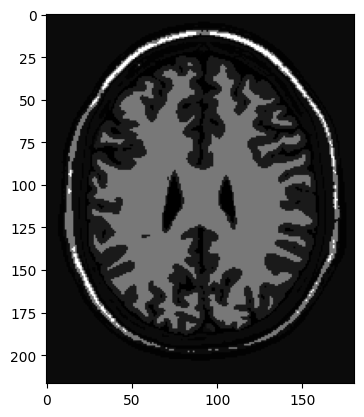

In [ ]:
plt.imshow(DIR_image_x.get_fdata()[100,:,:], cmap= "gray")

### Zipping and downloading to PC

In [ ]:
!zip -r /content/T2_w.zip /content/T2_w
!zip -r /content/pd_w.zip /content/pd_w
!zip -r /content/T1_w.zip /content/T1_w

  adding: content/T2_w/ (stored 0%)
  adding: content/T2_w/T2_w 66.png (stored 0%)
  adding: content/T2_w/T2_w 119.png (deflated 1%)
  adding: content/T2_w/T2_w 16.png (stored 0%)
  adding: content/T2_w/T2_w 82.png (stored 0%)
  adding: content/T2_w/T2_w 143.png (deflated 4%)
  adding: content/T2_w/T2_w 100.png (deflated 1%)
  adding: content/T2_w/T2_w 115.png (deflated 1%)
  adding: content/T2_w/T2_w 58.png (stored 0%)
  adding: content/T2_w/T2_w 24.png (stored 0%)
  adding: content/T2_w/T2_w 59.png (stored 0%)
  adding: content/T2_w/T2_w 57.png (stored 0%)
  adding: content/T2_w/T2_w 98.png (deflated 0%)
  adding: content/T2_w/T2_w 35.png (stored 0%)
  adding: content/T2_w/T2_w 174.png (deflated 27%)
  adding: content/T2_w/T2_w 4.png (stored 0%)
  adding: content/T2_w/T2_w 180.png (deflated 23%)
  adding: content/T2_w/T2_w 26.png (stored 0%)
  adding: content/T2_w/T2_w 71.png (stored 0%)
  adding: content/T2_w/T2_w 43.png (stored 0%)
  adding: content/T2_w/T2_w 19.png (stored 0%)
  a

In [ ]:
from google.colab import files

files.download('/content/T2_w.zip')
files.download('/content/pd_w.zip')
files.download('/content/T1_w.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Below part is just extra that I tried for to understand more.

# END

## find how to find vmax and vmin of an image.

# SSL-MRI Model - Machine Learning/Deep Learning

## preprocessing

In [ ]:
import os
import numpy as np
import nibabel as nib
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation
from scipy.ndimage import zoom
from keras import layers
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data, img.header.get_zooms()[:3]  # Return the voxel size as well

In [ ]:
def preprocess_nifti(data, voxel_size):
    # Normalize data to range [0, 1]
    data = (data - np.min(data)) / (np.max(data) - np.min(data))

    # Resize data to desired voxel size
    new_shape = np.round(np.array(data.shape) * np.array(voxel_size) / np.array(voxel_size)).astype(int)  # Use the specified voxel size
    preprocessed_data = resize(data, new_shape, anti_aliasing=True)

    return preprocessed_data

In [ ]:
def load_training_data(file_paths, voxel_size):
    images = []
    for file_path in file_paths:
        data, _ = load_nifti(file_path)
        preprocessed_data = preprocess_nifti(data, voxel_size)
        images.append(preprocessed_data)

    # Concatenate images along the last axis to create a single tensor
    input_tensor = np.stack(images, axis=-1)

    return input_tensor, input_tensor

## Load data

In [ ]:
import glob

file_paths = glob.glob('/content/train_new/*.nii.gz')
X_train, y_train = load_training_data(file_paths, voxel_size=[1.0, 1.0, 1.0])

In [ ]:
np.array(X_train).shape # 181,217,181,3

(181, 217, 181, 3)

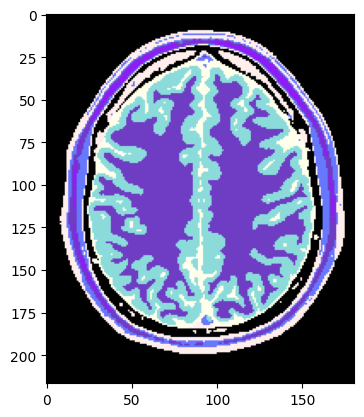

In [ ]:
plt.imshow(X_train[110],cmap="gray")

In [ ]:
np.max(X_train)

1.0

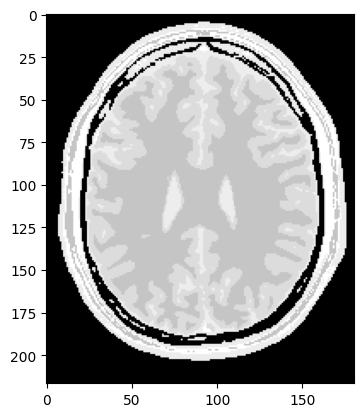

In [ ]:
plt.imshow(X_train[100,:,:,2], cmap = "gray") ## to bright is fse, too dark is dir mid is flair ; t1 too bright, t2 dim, flair is mid

In [ ]:
"""
train file order is not in the same order as in the loss function to be able to make [:,:,:,0] [:,:,:,1] [:,:,:,2] order
for this specific load I make this switch. 

On a normal basis we don't need such thing. (and for the generalized system I will prevent this from occurring.)

X_train_a = np.copy(X_train)
y_train_a = np.copy(y_train)

y_train_a[:,:,:,0] = y_train[:,:,:,1]
y_train_a[:,:,:,1] = y_train[:,:,:,0]

X_train_a[:,:,:,0] = X_train[:,:,:,1]
X_train_a[:,:,:,1] = X_train[:,:,:,0]

I don't think I need this any more.

"""

"\ntrain file order is not in the same order as in the loss function to be able to make [:,:,:,0] [:,:,:,1] [:,:,:,2] order\nfor this specific load I make this switch. \n\nOn a normal basis we don't need such thing. (and for the generalized system I will prevent this from occurring.)\n\nX_train_a = np.copy(X_train)\ny_train_a = np.copy(y_train)\n\ny_train_a[:,:,:,0] = y_train[:,:,:,1]\ny_train_a[:,:,:,1] = y_train[:,:,:,0]\n\nX_train_a[:,:,:,0] = X_train[:,:,:,1]\nX_train_a[:,:,:,1] = X_train[:,:,:,0]\n\nI don't think I need this any more.\n\n"

In [ ]:
X_train_a = np.copy(X_train)
y_train_a = np.copy(y_train)

y_train_a[:,:,:,2] = y_train[:,:,:,1] 
y_train_a[:,:,:,1] = y_train[:,:,:,2]

X_train_a[:,:,:,2] = X_train[:,:,:,1]
X_train_a[:,:,:,1] = X_train[:,:,:,2]


In [ ]:
X_train = X_train_a
y_train = y_train_a

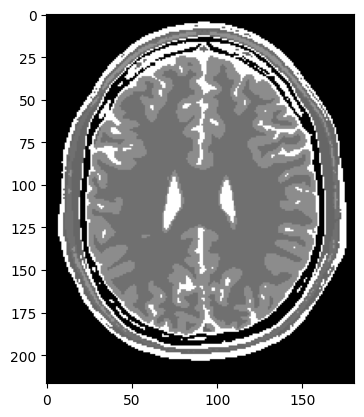

In [ ]:
plt.imshow(X_train[100,:,:,1] ,cmap = "gray")

In [ ]:
np.min(X_train)

0.0

In [ ]:
np.isnan(X_train).any()

False

In [ ]:
#pd_map_array
#T2_map_array
#T1_map_array

# Stack the arrays along the last axis to create a 4D array
prep_T1_map_array = preprocess_nifti(T1_map_array, voxel_size=[1.0,1.0,1.0])
prep_T2_map_array = preprocess_nifti(T2_map_array, voxel_size=[1.0,1.0,1.0])
prep_pd_map_array = preprocess_nifti(pd_map_array, voxel_size=[1.0,1.0,1.0])
X_test = np.stack((prep_T1_map_array, prep_T2_map_array, prep_pd_map_array), axis=-1)

# The resulting array has shape (181, 217, 181, 3)
print(X_test.shape)

(181, 217, 181, 3)


In [ ]:
#X_test = np.repeat(X_test, len(X_train)/len(X_test), axis=0)

In [ ]:
print(X_test.shape)

(181, 217, 181, 3)


## custom loss

with FLAIR DIR FSE

In [ ]:
def custom_loss(y_true, y_pred, l1_weight=0.01, l2_weight=0.00, TI1=2208, TI2 = 545, Tsat=1400, TI=2075, TR=6670, TE=50, epsilon=1e-8):
    # Extract T1, T2, and PD maps from y_pred
    T1_pred, T2_pred, PD_pred = y_pred[:, :, :, 0], y_pred[:, :, :, 1], y_pred[:, :, :, 2] #  DIR [0],FLAIR[1],  FSE [2]  29/3/2023

    """
    https://brainweb.bic.mni.mcgill.ca/brainweb/tissue_mr_parameters.txt
    the The applied multiplications are based on the brainweb txt In a generalized manner 
    one can consider those values as the maximum of each. So actually should be as; 
    T1_pred = T1_pred*np.max(T1_pred)
    T2_pred = T2_pred*np.max(T2_pred)
    This is done due to softmax activation makes weights in between 0 and 1.
    Didn't apply it on to Proton Density map because it is already in between 0 and 1.
    y_true[:,:,:,0] is fse, y_true[:,:,:,2] is flair

    loss = K.mean(K.square(Img1 - y_true[:, :, :, 0]) + K.square(Img2 - y_true[:, :, :, 1]) + K.square(Img3 - y_true[:, :, :, 2]))
    if it is this type then channels were not appropriate. Refer to load data.

    We apply T2_w FSE and Flair because we only put images of those, however in a generalized model, we will apply all types of image
    and we will make a system for that.

    DIR resembles T1, FLAIR resembles T2 and FSE for PD structural similarities
    """
    T1_pred = T1_pred*2569 # to make them in the same region of Ground truth
    T2_pred = T2_pred*329 # to make them in the same region of Ground truth

    # Define the three Bloch equations with epsilon added to avoid zero division errors
    Img1 = PD_pred * (1- 2*K.exp(-TI2 / (T1_pred + epsilon))+ (2*K.exp(-(TI1 + TI2)/(T1_pred + epsilon))) - K.exp(-TR/(T1_pred+epsilon)))*K.exp(-TE/(T2_pred+epsilon)) # DIR
    Img2 = PD_pred * K.exp(-Tsat / (T1_pred + epsilon)) * (1 - 2 * K.exp(-TI / (T1_pred + epsilon))) * K.exp(-TE / (T2_pred + epsilon)) # FLAIR
    Img3 = PD_pred * (1 - K.exp(-TR / (T1_pred + epsilon)) * K.exp(-TE / (T2_pred + epsilon))) # FSE

    # Compute the mean squared error between the predicted and true images
    loss = K.mean(K.square(Img1 -  y_true[:, :, :, 0]) + K.square(Img2 - y_true[:, :, :, 1]) + K.square(Img3 - y_true[:, :, :, 2]))
    
    # Compute L1 and L2 regularization penalties
    l1_penalty = K.sum(K.abs(loss))
    l2_penalty = K.sum(K.square(loss))

    # Add the regularization penalties to the loss
    loss += l1_weight * l1_penalty + l2_weight * l2_penalty

    return loss

## Custom Loss for T1 T2


In [ ]:
def custom_loss_t1(y_pred, y_true, l1_weight=0.01, l2_weight=0.01, TI1=2208, TI2 = 545, Tsat=1400, TI=2075, TR=6670, TE=50, epsilon=1e-8):
    # Extract T1, T2, and PD maps from y_pred
    T1_pred, T2_pred, PD_pred = y_pred[:, :, :, 0], y_pred[:, :, :, 1], y_pred[:, :, :, 2] #  T1-w [0],T2-w [1],  FLAIR [2]  29/3/2023

    """
    https://brainweb.bic.mni.mcgill.ca/brainweb/tissue_mr_parameters.txt
    the The applied multiplications are based on the brainweb txt In a generalized manner 
    one can consider those values as the maximum of each. So actually should be as; 
    T1_pred = T1_pred*np.max(T1_pred)
    T2_pred = T2_pred*np.max(T2_pred)
    This is done due to softmax activation makes weights in between 0 and 1.
    Didn't apply it on to Proton Density map because it is already in between 0 and 1.
    y_true[:,:,:,0] is fse, y_true[:,:,:,2] is flair

    loss = K.mean(K.square(Img1 - y_true[:, :, :, 0]) + K.square(Img2 - y_true[:, :, :, 1]) + K.square(Img3 - y_true[:, :, :, 2]))
    if it is this type then channels were not appropriate. Refer to load data.

    We apply T2_w FSE and Flair because we only put images of those, however in a generalized model, we will apply all types of image
    and we will make a system for that.

    DIR resembles T1, FLAIR resembles T2 and FSE for PD structural similarities
    """
    T1_pred = T1_pred*2569 # to make them in the same region of Ground truth
    T2_pred = T2_pred*329 # to make them in the same region of Ground truth

    # Define the three Bloch equations with epsilon added to avoid zero division errors
    Img1 = PD_pred * (1-K.exp(-TR/(T1_pred + epsilon)))# T1-w according to nishimura book.
    Img2 = PD_pred * (K.exp(-TE/(T2_pred+epsilon))) # T2-w according to nishimura book.
    Img3 = PD_pred * K.exp(-Tsat / (T1_pred + epsilon)) * (1 - 2 * K.exp(-TI / (T1_pred + epsilon))) * K.exp(-TE / (T2_pred + epsilon)) # FLAIR

    # Compute the mean squared error between the predicted and true images
    loss = K.mean(K.square(Img1 -  y_true[:, :, :, 0]) + K.square(Img2 - y_true[:, :, :, 1]) + K.square(Img3 - y_true[:, :, :, 2]))
    
    # Compute L1 and L2 regularization penalties
    l1_penalty = K.sum(K.abs(loss))
    l2_penalty = K.sum(K.square(loss))

    # Add the regularization penalties to the loss
    loss += l1_weight * l1_penalty + l2_weight * l2_penalty

    return loss

## To prevent random change in loss (seed)

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(14) # number of the universe/3 :)

## sequential model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Define Keras model
input_shape = (217, 181 ,3)

# Define number of output channels
num_output_channels = 3

model = tf.keras.Sequential([
  tf.keras.Input(shape=input_shape),
  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  # Add more layers here
  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(64, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(64, 3, padding='same'),
  layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(128, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(128, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(256, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(256, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),

  layers.Conv2D(num_output_channels, 1, padding='same'),
  layers.Activation('softmax'),
  #layers.Cropping2D(cropping=((1, 0), (1, 0)), data_format=None)
  #Reshape to 181x217x181x3
])

model.build(input_shape)

"""
this one is slower due to no pooling + upsampling and downsampling, so uses high resolution images 
on the learning curve, that's why it is slower than u-net however slower is better since we need more
detailed learning.

"""

"\nthis one is slower due to no pooling + upsampling and downsampling, so uses high resolution images \non the learning curve, that's why it is slower than u-net however slower is better since we need more\ndetailed learning.\n\n"

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 181, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 217, 181, 32)     128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 217, 181, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 217, 181, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 217, 181, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 217, 181, 32)      0

## Autoencoder Model

In [ ]:
"""tf.keras.backend.clear_session()"""

In [ ]:
"""
# Define Keras model
input_shape = (217, 181 ,3)

# Define number of output channels
num_output_channels = 3

# Encoder part
encoder = tf.keras.Sequential([
  tf.keras.Input(shape=input_shape),

  layers.Conv2D(32, 3,strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(64, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(64, 3, padding='same'),
  layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(128, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(128, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(256, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(256, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

])

# Decoder part
decoder = tf.keras.Sequential([

  layers.Conv2DTranspose(256, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(256, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(128, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(128, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(64, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(64, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(32, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2DTranspose(32, 3, padding='same'),
  layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(alpha=0.2),

  layers.Conv2D(num_output_channels, 1, padding='same'),
  layers.Activation('softmax')
])

# Define full model
inputs = tf.keras.Input(shape=input_shape)
x = encoder(inputs)
outputs = decoder(x)
model = tf.keras.Model(inputs, outputs)

# Print the model summary
model.summary()

"""

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 217, 181, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 217, 181, 512)     4728756   
                                                                 
 sequential_1 (Sequential)   (None, 217, 181, 3)       7087959   
                                                                 
Total params: 11,816,715
Trainable params: 11,808,555
Non-trainable params: 8,160
_________________________________________________________________


## Extra model (U-net architecture) not used

In [ ]:
"""
img_size = (217,181)
num_classes = 3

def get_model(img_size, num_classes):
    inputs = tf.keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=1, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("LeakyReLU")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("LeakyReLU")(x)
        x = layers.SeparableConv2D(filters, 3,strides = 1 ,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("LeakyReLU")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=1, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=1, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("LeakyReLU")(x)
        x = layers.Conv2DTranspose(filters, 3,strides = 1, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("LeakyReLU")(x)
        x = layers.Conv2DTranspose(filters, 3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides = 1,padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = tf.keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()
"""


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 217, 181, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 217, 181, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 217, 181, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

## Model Compile Adam

In [ ]:
model.compile(loss=custom_loss_t1, optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3,name="Adam")) # will try rmsprop, sgd too.
# deleted the clipvalue = 1, from optimizer since I assume we don't need to handle gradient vanish anymore.


## Model Compile RMSprop

In [ ]:
model.compile(loss=custom_loss_t1, optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3,name="RMSprop"))

## Plot the Model Architecture

In [ ]:
from keras.utils import plot_model

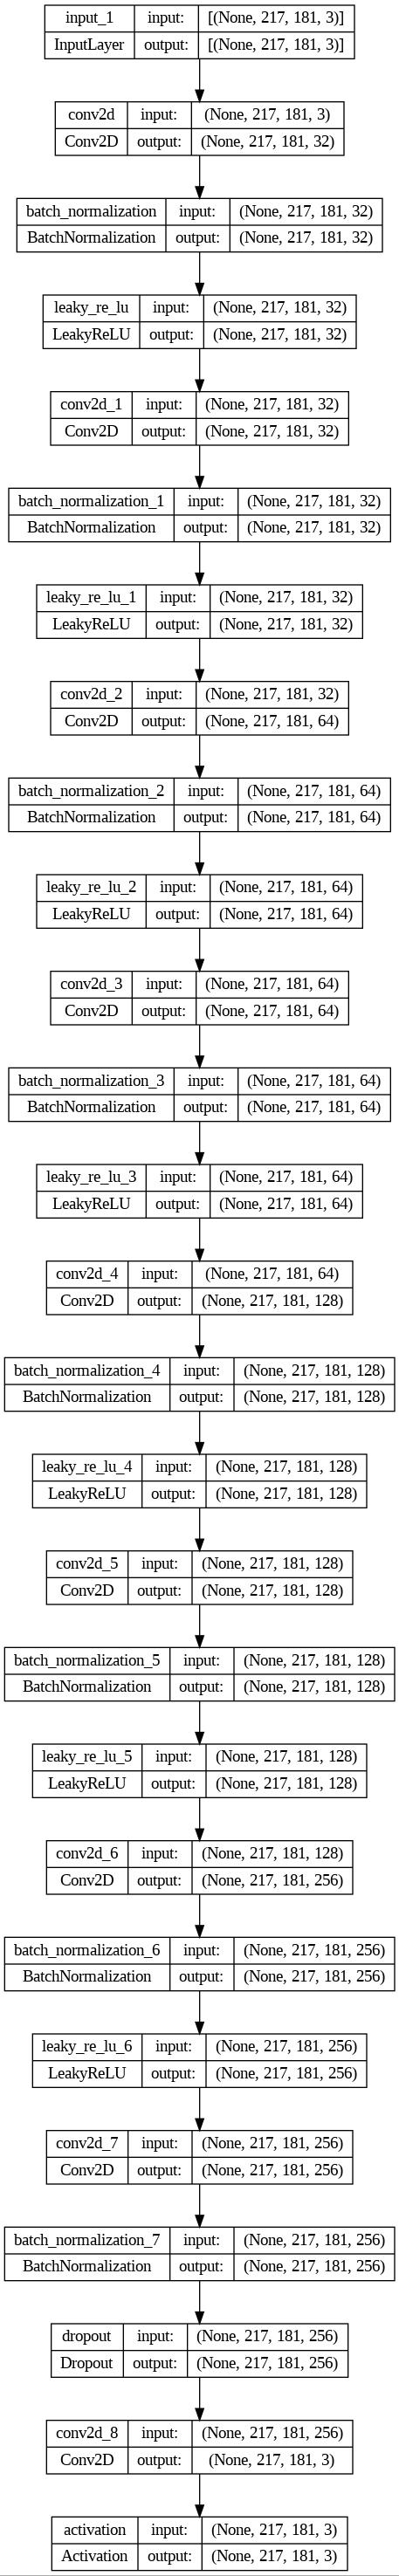

In [ ]:
ifile = 'model.jpg'
tf.keras.utils.plot_model (model, to_file = ifile, show_shapes = True, show_layer_names = True)

## Remove directory (extra)

In [ ]:
!rm -r /content/epochs to remove the epochs directory

rm: cannot remove '/content/epochs': No such file or directory
rm: cannot remove 'to': No such file or directory
rm: cannot remove 'remove': No such file or directory
rm: cannot remove 'the': No such file or directory
rm: cannot remove 'epochs': No such file or directory
rm: cannot remove 'directory': No such file or directory


##Checkpoints

In [ ]:
image_path = "/content/epochs"
os.mkdir(image_path)

In [ ]:
filepath = "/content/epochs/saved-model-{epoch:02d}-{loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss',save_freq="epoch",verbose=1, save_best_only=False, mode='max')

## Make the validation set

In [ ]:
# Add noise to test images
noise_factor = 0.1 # we can also add 0.3. More would be too much since values are normalized.
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)


In [ ]:
## Add noise to the train
noise_factor = 5e-6
x_train_noisy = X_train + noise_factor *np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

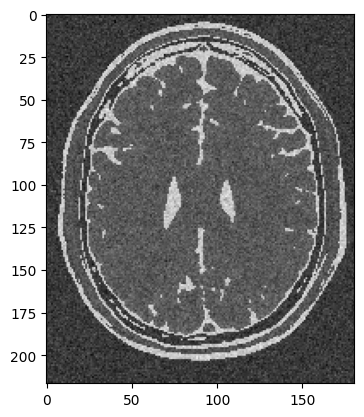

In [ ]:
#check the noise
plt.imshow(x_test_noisy[100,:,:,1], cmap = "gray")

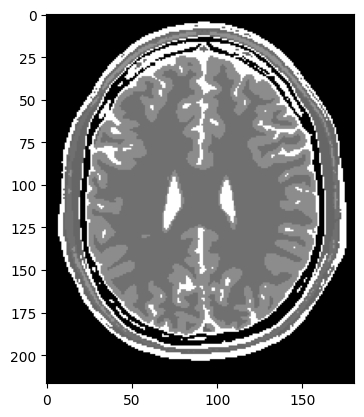

In [ ]:
plt.imshow(x_train_noisy[100,:,:,1], cmap = "gray")

## Trials

For U-NET
1. w/ lasso ve ridge penalty -- loss: 0.3088 - val_loss: 0.3268 , Reconstruction error:  0.226, Evaluation loss: 0.4421, RMSE: 0.4926, PSNR = 54.21, ssim_score: 0.2021 +++

2. w/o lasso and ridge regularization -- val_loss : 0.32 loss :0.32 (keeps decreasing overfit) - Reconstruction error:  0.251 (to prevent overfit 10 epochs sufficient.) SSIM  == 0.34 RMSE == 0.52 PSNR = 53.8 eval_loss = 0.41 ++

3. w/ lasso(l1) only --loss: 0.3112 - val_loss: 0.3155,
Reconstruction error: 0.2367, Evaluation loss: 0.4368, RMSE: 0.5055,
PSNR = 54.055, ssim_score: 0.2796

4. w/ ridge(l2) only-- loss: 3.1400 - val_loss: 0.7991, eval_loss = 0.7991,
RSME = 0.6558, ssim_score: 0.2584 ,Reconstruction error:  0.4423, RMSE: 0.6558, 
PSNR = 51.7953 (only using Ridge makes our model learn nothing. So we should not use l2.)

l1 is the best among all.

For Simple CNN

1. w/ lasso ve ridge regularization -- loss: 3.4419 - val_loss: 0.8531,eval_loss: 0.8855, RMSE: 0.6558,Reconstruction error: 0.2792,ssim_score: 0.2464,
PSNR = 51.8638 ++

2. (for 42) w/o lasso and ridge regularization -- loss: 0.0673 - val_loss: 0.2756, PSNR =53.4969, ssim_score: 0.2369, Reconstruction error = 0.2459, RMSE: 0.5391, for FSE,FLAIR DIR it was loss = 0.3, val_loss 0.55 ++ (overfitted so less epoch.) 

-- random_seed also changes the loss and overfit. So  I tried 42 and 14 for 2. w/o Simple CNN will also try for others hera re the results for 14 (all the other results are taken for 14 not 42, but will make them 42 too.)

2. w/o lasso and ridge regularization -- loss: 0.2691 - val_loss: 0.3340,reconstruction_error = 0.2639, Evaluation loss: 0.4382, RMSE: 0.5394, 
PSNR= 53.4918, ssim_score: 0.2791. 

3. w/ lasso(l1) only --loss: 0.2717 - val_loss: 0.3381, Reconstruction error:  0.2646, Evaluation loss: 0.4387, 

4. w/ ridge(l2) only--loss: 0.2717 - val_loss: 0.3201, Evaluation loss: 0.4292,
Reconstruction error:  0.2152,  RMSE: 0.5394, PSNR = 54.3704, ssim_score: 0.1155

-- extra note: different weighted images have different structural similarities to the t1,t2,pd so even changing what they represent change the loss. For example if we wish fse to represent t1 then it is whole another topic, if we want flair to represent t1 it is something else.

-- 25 or 15 or 10 epochs are too much, lowered to 5. (they all overfit.)
-- I will make another ipynb for this one and report all in the slide

-- Change of formulation after 4 of each. Now I will use T1w -T2w and FLAIR (flair is the best one to show pd T1w is best for T1 and T2w is best for T2.)


--- FLAIR T1 T2 (experimenting with different filter sizes, if more complex filtering works will try to the up one too.)
For U-NET (seed 42)
1. w/ lasso ve ridge penalty -- (the results are for this one.) loss: 0.62 - val_loss: 0.6734, Evaluation loss: 0.6733, RMSE: 0.6534, ssim_score: 0.2812, PSNR 51.8269

2. w/o lasso and ridge regularization -- 

3. w/ lasso(l1) only --

4. w/ ridge(l2) only-- 


For Simple CNN (seed 42)

1. w/ lasso ve ridge regularization -- loss: 0.3376 - val_loss: 0.5903, Reconstruction error:  0.2497, RMSE: 0.4988, PSNR = 54.1716 , ssim_score: 0.4296; 

1. Also tried with more filters (8 filters with [32,32,64,64,128,128,256,256]), Evaluation loss: 0.2243, loss: 0.2087 - val_loss: 0.2346, RMSE: 0.4681, PSNR: 54.7225,ssim_score: 0.1007

1. Now trying with AutoEncoder CNN model with 8 filters, tons of parameters that we are trying to prevent. (looks like more complex autoencoder does not change much, but we'll see the result) PSNR: 55.0022, RMSE = 0.45, loss: 0.2068 - val_loss: 0.2351, eval_loss = 0.21, Reconstruction error:  0.24859, more than 256 filter didn't decrease loss however made easier overfit.

1. AE CNN with 16-16 encoder-decoder filters from (4,8,16,32,64,128,256,512) with high resolution preserved with stride = 1. however only changed the spot where we overfit. (Easier to overfit, too much parameters, computationally costly and inefficient.)
Evaluation loss: 0.2136, minimum (loss: 0.2105 - val_loss: 0.2557), last (loss: 0.2074 - val_loss: 0.3548), RMSE: 0.5433, PSNR= 53.4285, ssim_score: 0.0542 (similarity decreased harshly.).

1. Different Optimizer with Also tried with more filters (8 filters with [32,32,64,64,128,128,256,256]) sequential. loss: 0.2504 - val_loss: 0.2710, Evaluation loss: 0.2819, PSNR: 54.6716, RMSE= 0.4709, ssim_score: 0.1276

Lets continue with regular experiment.



2. w/o lasso and ridge regularization -- 

3. w/ lasso(l1) only --

4. w/ ridge(l2) only--


-- I will also try with different seed for each

-- NOTES TO ADD: Batch size won't change a thing, epoch does not change a thing. Seed may change we will try. BUT Filter size changes. It is probably it gets more in depth knowledge of the nature of the system.
--- More notes: More filtering with AEcnn doesn't change the validation loss, Maybe higher filtering more than 256 will change. So let's try that. (will add those comments here.)

## Model fit

In [ ]:
# Train model
history = model.fit(X_train, y_train, batch_size=3, epochs=6, callbacks=[checkpoint], validation_data=(X_test,X_test))
# most of my experiments saturate at 5-10 epochs
# 5 of each image is sufficient. lower makes not good representations higher makes saturation
# DIR 0 FLAIR 1 FSE 2 trying to apply structural similarities.
# now T1W 0 T2W 1 FLAIR 2
## report -- it was not clever to add noise to the input. Experimented and it acted poorly. We were trying to find true labels and it was hard even with normal data, 
## I don't know what made me  try that. 

Epoch 1/6
61/61 [==============================] - ETA: 0s - loss: 0.6928
Epoch 1: saving model to /content/epochs/saved-model-01-0.69.hdf5
61/61 [==============================] - 386s 6s/step - loss: 0.6928 - val_loss: 0.4326
Epoch 2/6
61/61 [==============================] - ETA: 0s - loss: 0.3262
Epoch 2: saving model to /content/epochs/saved-model-02-0.33.hdf5
61/61 [==============================] - 379s 6s/step - loss: 0.3262 - val_loss: 0.2991
Epoch 3/6
61/61 [==============================] - ETA: 0s - loss: 0.2678
Epoch 3: saving model to /content/epochs/saved-model-03-0.27.hdf5
61/61 [==============================] - 379s 6s/step - loss: 0.2678 - val_loss: 0.2906
Epoch 4/6
61/61 [==============================] - ETA: 0s - loss: 0.2567
Epoch 4: saving model to /content/epochs/saved-model-04-0.26.hdf5
61/61 [==============================] - 380s 6s/step - loss: 0.2567 - val_loss: 0.2923
Epoch 5/6
61/61 [==============================] - ETA: 0s - loss: 0.2584
Epoch 5: savin

## Grid Search For best

In [ ]:

## I wrote this but, I suppose won't do much work.  I just wanted to add this here for inspiration might delete later.

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from keras.layers import Conv2D,Dropout
from keras.regularizers import l2

## Define the model architecture
def create_model(num_layers, num_filters, filter_size, learning_rate, momentum, weight_decay, dropout_rate):
    model = model()
    for i in range(num_layers):
        if i == 0:
            model.add(Conv2D(num_filters, filter_size, padding='same', activation='relu', input_shape=input_shape, kernel_regularizer=l2(weight_decay)))
        else:
            model.add(Conv2D(num_filters, filter_size, padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        model.add(Dropout(dropout_rate))
    optimizer = tf.kerasAdam(lr=learning_rate, beta_1=momentum)
    model.compile(optimizer=optimizer, loss=custom_loss)
    return model

# Define the hyperparameters to be tuned
param_grid = {'num_layers': [2, 3, 4],
              'num_filters': [16, 32, 64],
              'filter_size': [(3,3), (5,5), (7,7)],
              'learning_rate': [0.0001, 0.001, 0.01],
              'momentum': [0.9, 0.95, 0.99],
              'weight_decay': [0.0001, 0.001, 0.01],
              'dropout_rate': [0.1, 0.2, 0.3]}

# Create a KerasRegressor object
model = KerasRegressor(build_fn=create_model, epochs=2, batch_size=3, verbose=0)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train, validation_data=(x_test_noisy, X_test))

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)


## Compute reconstruction error

In [ ]:
x_test_pred = model.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - x_test_pred))
print("Reconstruction error: ", reconstruction_error)
## lower better for most times.

6/6 [==============================] - 82s 13s/step
Reconstruction error:  0.2327650794481145


## Compute FID (Frechet Inception Distance) Error

In [ ]:
""" 
A lower FID score indicates 
better similarity between the generated
images and the real images.

measures the similarity between the generated images and a set of real images 
in terms of their feature representations learned by a pre-trained deep neural network.

Based on the Frechet distance between two multivariate Gaussians that model the distributions 
of the feature representations of the real and generated images

1. Compute the feature representations of the real and generated images using a pre-trained deep neural network. Typically, the Inception network is used for this purpose.
2. Compute the mean and covariance matrix of the feature representations for the real images and the generated images, separately.
3. Compute the Frechet distance between the two multivariate Gaussians using the formula:

FID = ||mu1 - mu2||^2 + Tr(C1 + C2 - 2 * sqrt(C1 * C2))

where mu1 and mu2 are the mean feature representations of the real and generated images,
respectively,and C1 and C2 are their covariance matrices.
"""
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

# Load InceptionV3 model and compute feature representations
model_x = InceptionV3(include_top=False, pooling='avg')
real_features = model_x.predict(preprocess_input(X_train))
fake_features = model_x.predict(preprocess_input(x_train_noisy))

# Compute mean and covariance matrix of real and fake features
mu1 = np.mean(real_features, axis=0)
mu2 = np.mean(fake_features, axis=0)
C1 = np.cov(real_features, rowvar=False)
C2 = np.cov(fake_features, rowvar=False)

# Add small amount of noise to covariance matrices
eps = 1e-6
C1 += eps * np.eye(C1.shape[0])
C2 += eps * np.eye(C2.shape[0])

# Compute FID score
diff = mu1 - mu2
diff_squared = diff.dot(diff)
trace = np.trace(C1 + C2 - 2 * np.sqrt(np.dot(C1, C2)))
fid = np.sqrt(diff_squared + trace)
print('FID score:', fid)

6/6 [==============================] - 4s 705ms/step
FID score: 0.33348660996057133


<ipython-input-385-329f703de887>:43: RuntimeWarning: invalid value encountered in sqrt
  trace = np.trace(C1 + C2 - 2 * np.sqrt(np.dot(C1, C2)))


## Save keras model

In [ ]:
model.save('my_model.h5')

## Visualize training curve

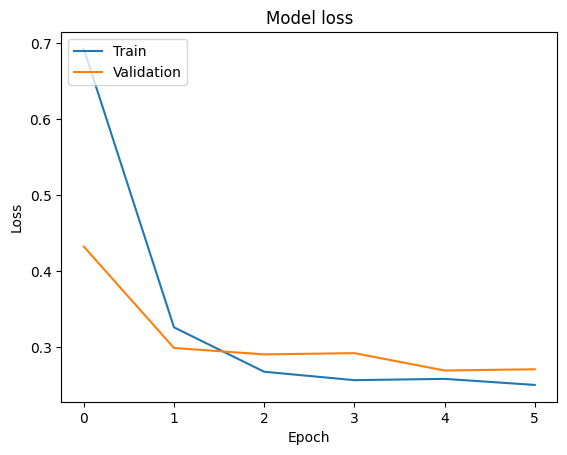

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

## Evaluate the model

In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Load the learned weights from an h5 file
weights = model.load_weights('saved-model-0.6-0.25.hdf5')

# Extract the learned features from a specific layer
layer_name = 'conv2d_8'
layer = model.get_layer(layer_name)
learned_features = layer.output

In [ ]:
# Extract the learned features from a specific layer
layer_name = 'conv2d_8'

In [ ]:
# Load the learned features from an h5 file
model = tf.keras.models.load_model('/content/epochs/saved-model-06-0.25.hdf5',custom_objects={'custom_loss_t1': custom_loss_t1})
learned_features = model.get_layer(layer_name).output


In [ ]:
loss = model.evaluate(X_train, X_test)

6/6 [==============================] - 82s 13s/step - loss: 0.2820


In [ ]:
print('Evaluation loss:', loss)
#print('Evaluation accuracy:', accuracy)

Evaluation loss: 0.2819601893424988


## Model images Evaluations, Predictions

In [ ]:
X_test_a = np.copy(X_test)

In [ ]:
X_test_a[:,:,:,0] = X_test[:,:,:,1]
X_test_a[:,:,:,1] = X_test[:,:,:,0]

In [ ]:
# Load your test data (inputs and true labels)

y_true = X_test

In [ ]:
y_true_plot = y_true

In [ ]:
# Use the model to make predictions
predict = model.predict(X_train)

6/6 [==============================] - 82s 13s/step


In [ ]:
predict.shape

(181, 217, 181, 3)

In [ ]:
plot_pre = predict

In [ ]:
plot_predict = plot_pre

In [ ]:
# Apply thresholding to set low values to zero
threshold = 1e-8  # set your threshold here
for i in range(0,3):
  if (i == 0):
    plot_predict[plot_predict < 0.5 *threshold] = 0
    plot_predict[(plot_predict > 3*threshold) & (plot_predict < 3000000*threshold)] = 100*plot_predict[(plot_predict > 3*threshold) & (plot_predict < 3000000*threshold)] 
    plot_predict[plot_predict >= 9.91909444e-01] = 0
  elif (i == 1):
    plot_predict[plot_predict < 2 * threshold] = 0
  else:
    plot_predict[plot_predict < 3 * threshold] = 0

In [ ]:
plot_predict_for_test = plot_predict

In [ ]:
# assuming y_true and y_pred have shape (181, 217, 181, N)
y_true = np.moveaxis(y_true, -1, 0)  # move the last axis to the first position
predict = np.moveaxis(predict, -1, 0)


# now y_true and y_pred have shape (N, 181, 217, 181)

In [ ]:
plot_predict_for_test = np.moveaxis(plot_predict_for_test, -1, 0)

In [ ]:
# Assuming y_true and y_pred are numpy arrays of shape (N, 181, 217, 181)
mse = np.mean((y_true - predict)**2)
psnr = 20 * np.log10(255) - 10 * np.log10(mse)

In [ ]:

# Boolean indexing to select non-zero elements
non_zero_idx = plot_predict_for_test != 0
img_pred_non_zero = plot_predict_for_test[non_zero_idx]
img_true_non_zero = y_true[non_zero_idx]

# Calculate the RMSE for non-zero elements
mse_with_threshold = np.mean((img_true_non_zero -img_pred_non_zero)**2)
rmse_with_threshold = np.sqrt(mse_with_threshold)


In [ ]:
psnr_with_thresholding = 20 * np.log10(255) - 10 * np.log10(mse_with_threshold)

In [ ]:
rmse = np.sqrt(mse)
rmse_with_threshold = np.sqrt(mse_with_threshold)

In [ ]:
print("MSE:", mse)
print("MSE_with_threshold:", mse_with_threshold)

MSE: 0.22177696638534214
MSE_with_threshold: 0.22177696638534106


In [ ]:
print("RMSE:", rmse)
print("RMSE_threshold (non-zero elements only):", rmse_with_threshold)

RMSE: 0.4709320188576501
RMSE_threshold (non-zero elements only): 0.47093201885764896


In [ ]:
print("PSNR:", psnr)
print("PSNR_with_thresholding:", psnr_with_thresholding)

PSNR: 54.67163922261253
PSNR_with_thresholding: 54.67163922261255


In [ ]:
from skimage.metrics import structural_similarity as ssim

# Assuming y_true and y_pred are numpy arrays of shape (N, 181, 217, 181)
ssim_score = np.mean([ssim(y_true[i], predict[i], multichannel=True) for i in range(len(y_true))])

<ipython-input-194-a944d720c359>:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = np.mean([ssim(y_true[i], predict[i], multichannel=True) for i in range(len(y_true))])
/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
print("ssim_score:",ssim_score)

ssim_score: 0.12765700957422527


In [ ]:
from sklearn.metrics import mean_squared_error

# assuming y_true and y_pred have shape (N, 181, 217, 181)
y_true_flat = y_true.flatten()
y_pred_flat = predict.flatten()
# compute the accuracy score for each sample


# assuming y_true and y_pred have shape (N, 181, 217, 181)
mse_x = mean_squared_error(y_true_flat, y_pred_flat)


print(f"Mean Squared Error: {mse_x}") # just wanted to see whether flattening changes anything at all. As expected we are making mse for each value pred and observed so does not change anything.

Mean Squared Error: 0.22177696638534106


## Predict maps

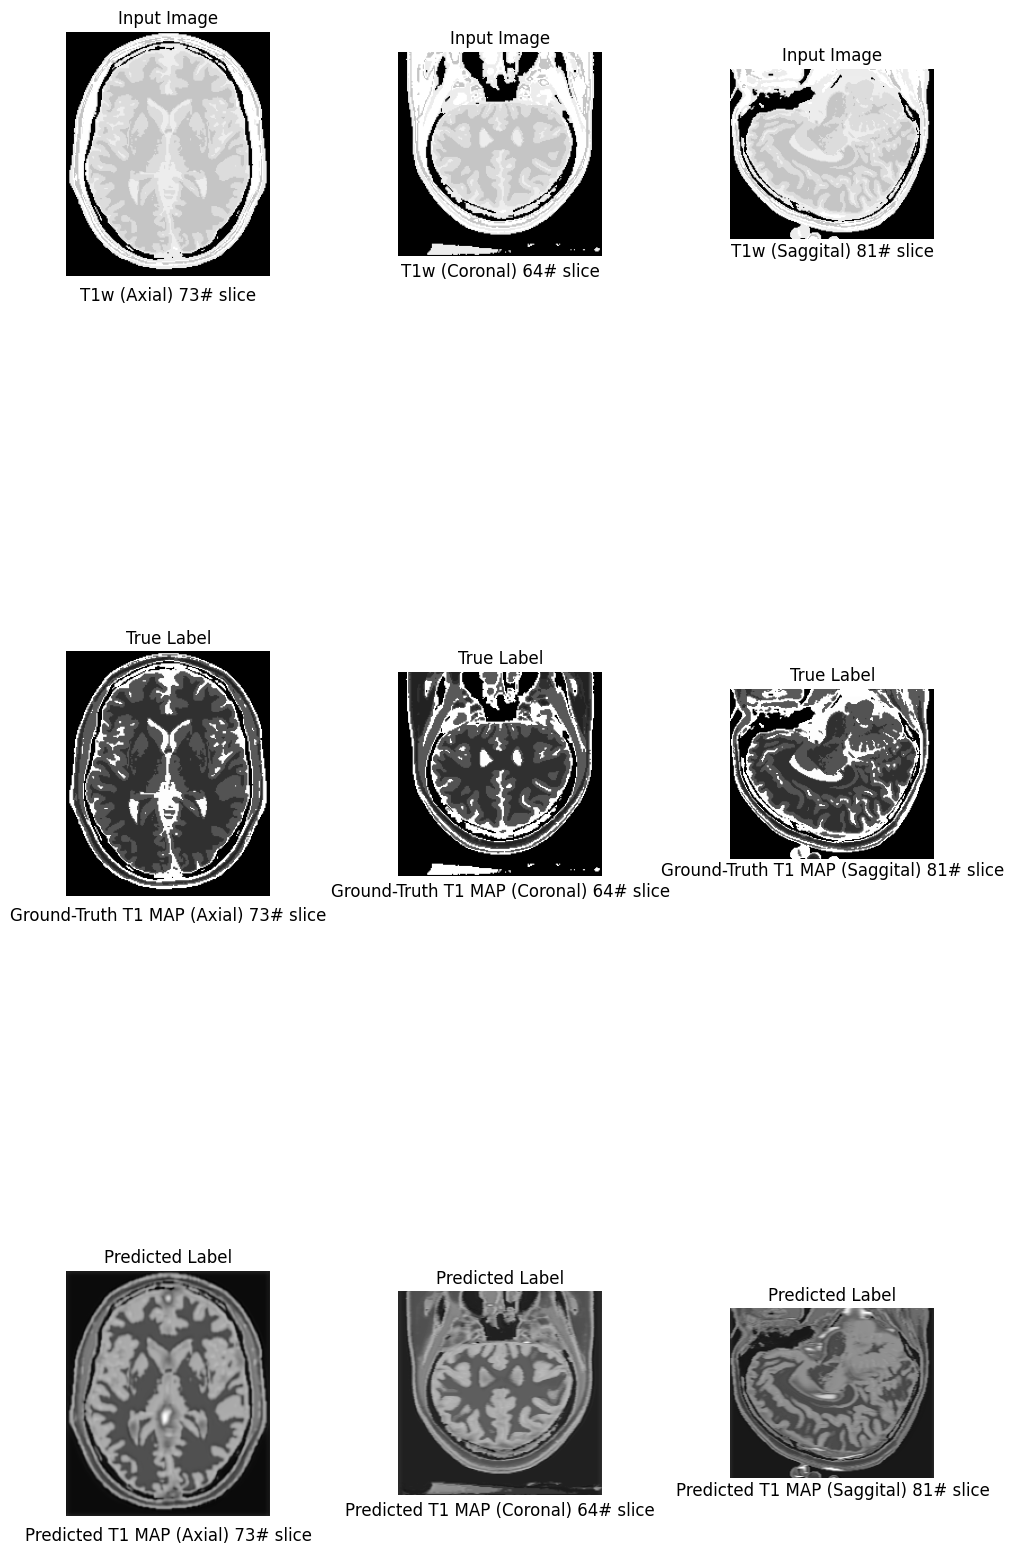

In [ ]:
# Visualize some of the input images alongside their true and predicted labels
n_samples = 3  # number of samples to visualize
indices = np.random.choice(range(int(round(len(X_test)/3,0)),int(round(len(X_test)/2,0))), n_samples, replace=False)

fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(10, 20))
for i, idx in enumerate(indices):
    if (i == 0): # axial
      axes[0][i].imshow(X_train[idx,:,:,0], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"T1w (Axial) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)
      
      axes[1][i].imshow(X_test[idx,:,:,0], cmap='gray')
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth T1 MAP (Axial) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)
      
      axes[2][i].imshow(plot_pre[idx,:,:,0], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted T1 MAP (Axial) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)

    elif (i == 1): # coronal
      axes[0][i].imshow(X_train[:,idx,:,0], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"T1w (Coronal) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)
      
      axes[1][i].imshow(X_test[:,idx,:,0], cmap='gray')
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth T1 MAP (Coronal) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)
      
      axes[2][i].imshow(plot_pre[:,idx,:,0], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted T1 MAP (Coronal) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)    
    
    else: # saggital
      axes[0][i].imshow(X_train[:,:,idx,0], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"T1w (Saggital) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)

      axes[1][i].imshow(X_test[:,:,idx,0], cmap='gray')
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth T1 MAP (Saggital) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)

      axes[2][i].imshow(plot_pre[:,:,idx,0], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted T1 MAP (Saggital) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)

plt.tight_layout()
plt.show()

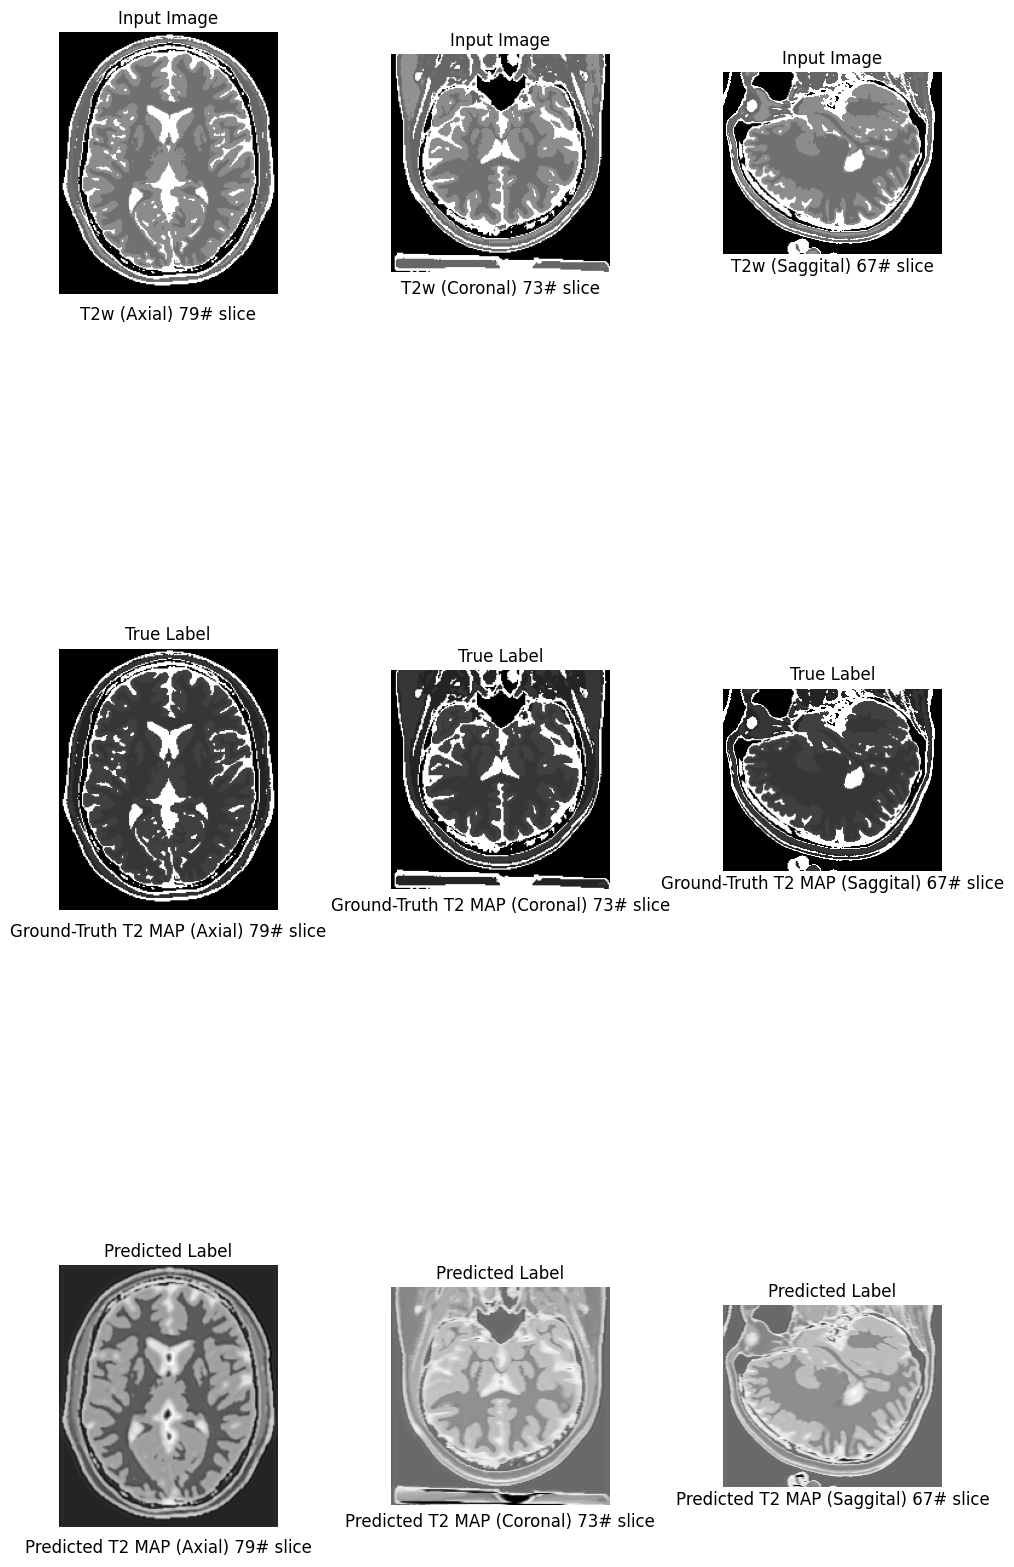

In [ ]:
# Visualize some of the input images alongside their true and predicted labels
n_samples = 3  # number of samples to visualize
indices = np.random.choice(range(int(round(len(X_test)/3,0)),int(round(len(X_test)/2,0))), n_samples, replace=False)

fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(10, 20))
fig.subplots_adjust(wspace=0.1, hspace=0.1)  # set the spacing between subplots

for i, idx in enumerate(indices):
    if (i == 0): # axial
      axes[0][i].imshow(X_train[idx,:,:,1], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"T2w (Axial) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)
      
      axes[1][i].imshow(X_test[idx,:,:,1], cmap='gray')
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth T2 MAP (Axial) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)
      
      axes[2][i].imshow(plot_pre[idx,:,:,1], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted T2 MAP (Axial) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)

    elif (i == 1): # coronal
      axes[0][i].imshow(X_train[:,idx,:,1], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"T2w (Coronal) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)
      
      axes[1][i].imshow(X_test[:,idx,:,1], cmap='gray' )
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth T2 MAP (Coronal) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)
      
      axes[2][i].imshow(plot_pre[:,idx,:,1], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted T2 MAP (Coronal) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)    
    
    else: # saggital
      axes[0][i].imshow(X_train[:,:,idx,1], cmap='gray' )
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"T2w (Saggital) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)

      axes[1][i].imshow(X_test[:,:,idx,1], cmap='gray' )
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth T2 MAP (Saggital) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)

      axes[2][i].imshow(plot_pre[:,:,idx,1], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted T2 MAP (Saggital) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)

plt.tight_layout()
plt.show()

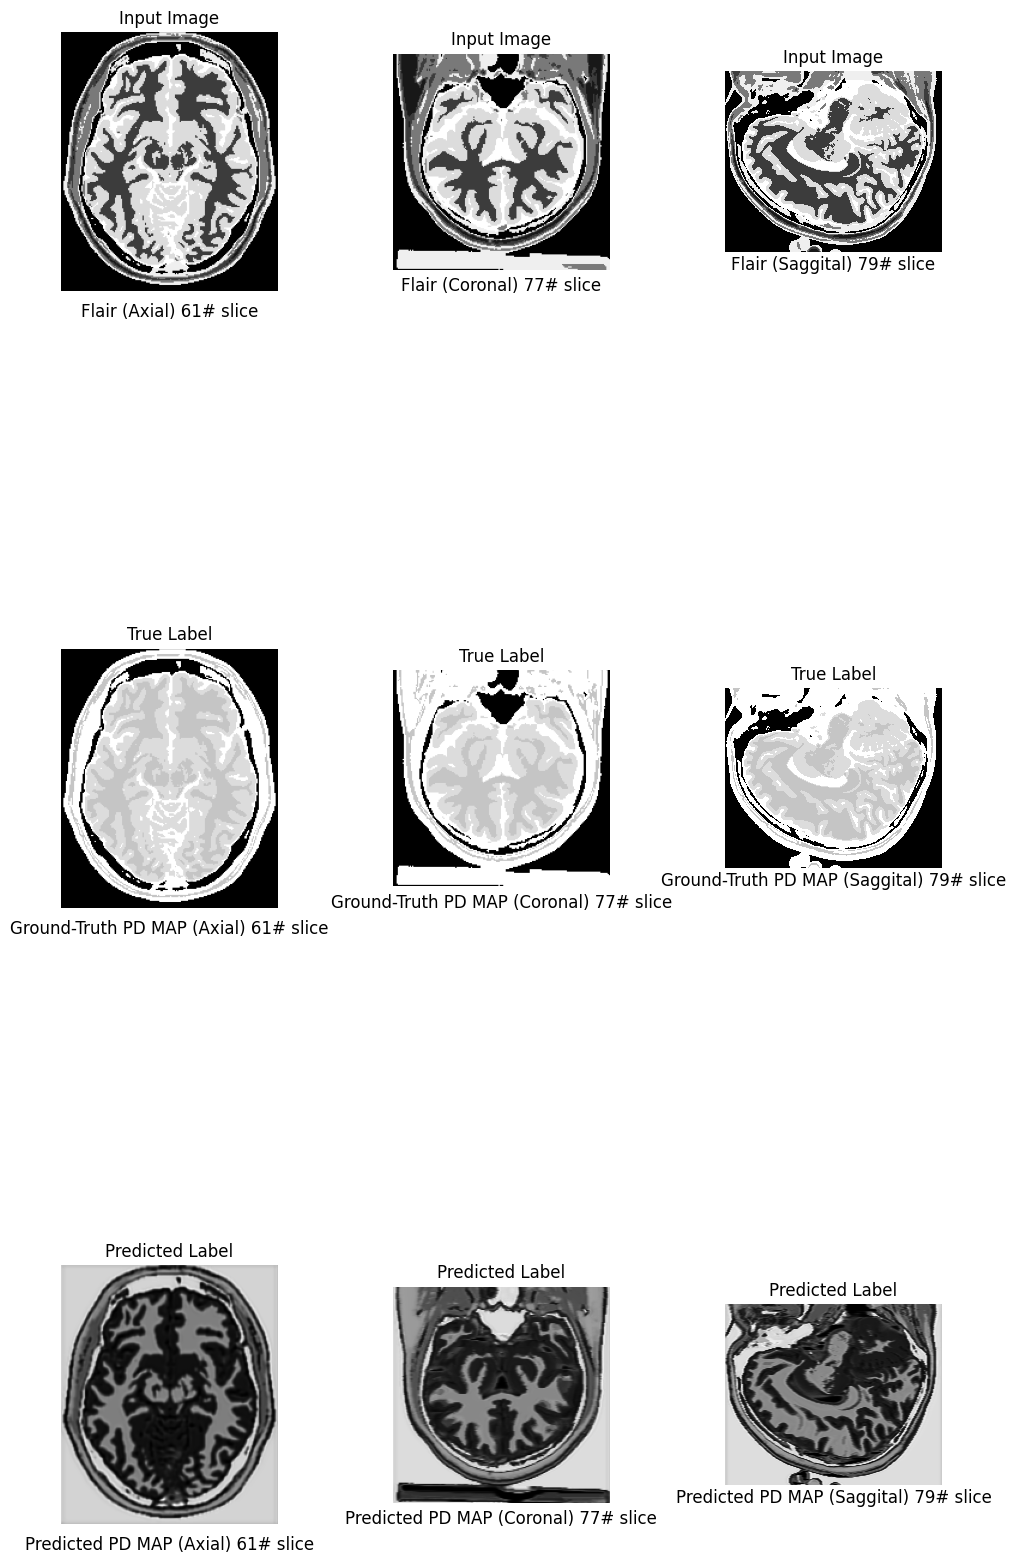

In [ ]:
# Visualize some of the input images alongside their true and predicted labels
n_samples = 3  # number of samples to visualize
indices = np.random.choice(range(int(round(len(X_test)/3,0)),int(round(len(X_test)/2,0))), n_samples, replace=False)

fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(10, 20))
fig.subplots_adjust(wspace=0.1, hspace=0.1)  # set the spacing between subplots

for i, idx in enumerate(indices):
    if (i == 0): # axial
      axes[0][i].imshow(X_train[idx,:,:,2], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"Flair (Axial) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)
      
      axes[1][i].imshow(X_test[idx,:,:,2], cmap='gray')
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth PD MAP (Axial) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)
      
      axes[2][i].imshow(plot_pre[idx,:,:,2], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted PD MAP (Axial) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)

    elif (i == 1): # coronal
      axes[0][i].imshow(X_train[:,idx,:,2], cmap='gray')
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"Flair (Coronal) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)
      
      axes[1][i].imshow(X_test[:,idx,:,2], cmap='gray' )
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth PD MAP (Coronal) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)
      
      axes[2][i].imshow(plot_pre[:,idx,:,2], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted PD MAP (Coronal) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)    
    
    else: # saggital
      axes[0][i].imshow(X_train[:,:,idx,2], cmap='gray' )
      axes[0][i].axis('off')
      axes[0][i].set_title("Input Image")
      axes[0][i].text(0.5, -0.1, f"Flair (Saggital) {idx}# slice", ha='center', transform=axes[0][i].transAxes, fontsize=12)

      axes[1][i].imshow(X_test[:,:,idx,2], cmap='gray' )
      axes[1][i].axis('off')
      axes[1][i].set_title("True Label")
      axes[1][i].text(0.5, -0.1, f"Ground-Truth PD MAP (Saggital) {idx}# slice", ha='center', transform=axes[1][i].transAxes, fontsize=12)

      axes[2][i].imshow(plot_pre[:,:,idx,2], cmap='gray') # can also use plot_predict to test
      axes[2][i].axis('off')
      axes[2][i].set_title("Predicted Label")
      axes[2][i].text(0.5, -0.1, f"Predicted PD MAP (Saggital) {idx}# slice", ha='center', transform=axes[2][i].transAxes, fontsize=12)


plt.tight_layout()
plt.show()

## Close to system

In [ ]:
tf.keras.backend.clear_session()

# Exercise finished.

In [ ]:
"""
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Define image preprocessing function
def preprocess_image(image):
    # Normalize pixel intensities to [0, 1]
    image = image.astype(np.float32) / 255.0
    
    # Resize image to desired shape
    image = tf.image.resize(image, (256, 256))
    
    return image

# Load MRI dataset
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
train_generator = train_datagen.flow_from_directory(
    '/content/',
    target_size=(256, 256),
    batch_size=32,
    class_mode=None)

# Preprocess images in batches
for images_batch in train_generator:
    preprocessed_images = np.array([preprocess_image(image) for image in images_batch])
    # Use preprocessed_images for training
    ...

"""    

In [ ]:
plt.imshow(data[:, :, 90].T, cmap = 'gray_r')

ValueError: 'Greys_s' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', '...


ValueError: 'Greys_s' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', '...


In [ ]:
%matplotlib inline
img

In [ ]:
nib.minc2.Minc2Image(img, img.affine, header=None, extra=None, file_map=None)

In [ ]:
inv_rec_2 = (data[100,:,:].T)*params_PD[2]*(1-np.exp(-(params_TR)/(params_T1[2]))) #2


In [ ]:
plt.imshow(data[100,:,:].T, cmap = 'gray_r')

In [ ]:
plt.imshow(inv_rec_2, cmap = 'gray_r')

In [ ]:
inv_rec_GM.mean()

In [ ]:
(data[36,:,:].T).mean()

In [ ]:
nib.save(nib.minc1.Minc1Image(inv_rec_GM, img.affine, header = None, extra= None, file_map="image"), 'inv_rec_GM.nii')

In [ ]:
nib.save(nib.minc1.Minc1Image(inv_rec_GM, img.affine, header = None, extra= None, file_map="image"), 'inv_rec_GM.mnc') # does not work ?

In [ ]:
plt.imshow(inv_rec_CSF, cmap = 'gray_r')

In [ ]:
plt.imshow(data[18, :, :].T, cmap = 'gray_r')

In [ ]:
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[exp(-TE/T2(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T2-weighted so in Z-dir
params_TE = 0.08 # echo time.
params_TR = 2.5 # Repetition neglect here
params_T2 = [0,0.329,0.083,0.07,0.07,0.047,0.329,0,0.083,0.07,0.237]
#k*rho = PD so apply pd to formula for T2W

params_PD = [0,1,0.86,0.77,1,1,1,0,0.86,0.77,0.76]

inv_rec_CSF_t2 = (data[:,:,18].T)*params_PD[1]*(np.exp(-(params_TE)/(params_T2[1]))) #1
inv_rec_GM_t2 = (data[:,:,36].T)*params_PD[2]*(np.exp(-(params_TE)/(params_T2[2]))) #2

In [ ]:
plt.imshow(inv_rec_GM_t2, cmap = 'gray_r')

In [ ]:
inv_rec_GM_t2.mean()
# image weights change but what happens I do not know.

In [ ]:
(data[:,:,36].T).mean()

In [ ]:
plt.imshow(data[:,:,36].T, cmap = 'gray_r')

In [ ]:

"""
Sample code


import os
import numpy as np
import nibabel as nib
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation

# Define preprocessing function for NIfTI images
def preprocess_nifti(filepath):
    img = nib.load(filepath).get_fdata()
    img = np.transpose(img, (1, 0, 2))  # transpose to match Keras' "channels_last" format
    img = img / np.max(img)  # normalize to [0, 1]
    return img[..., np.newaxis].astype(np.float32)  # add channel dimension and cast to float32

# Define custom loss function
def custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, bloch_factor=1.0):
    # Compute L1/L2 regularization loss
    l1_loss = l1_factor * K.sum(K.abs(y_pred))
    l2_loss = l2_factor * K.sum(K.square(y_pred))

    # Apply Bloch equation to predicted maps
    # Here, we assume that the predicted maps are the first two channels of the output tensor
    # You may need to adjust this depending on the output format of your model
    m_xy_pred = tf.math.sqrt(K.square(y_pred[:, :, :, 0]) + K.square(y_pred[:, :, :, 1]))
    t2_map_pred = -1.0 / K.log(tf.clip_by_value(m_xy_pred, 1e-10, 1.0))

    # Compute Bloch equation loss
    m_xy_true = tf.math.sqrt(K.square(y_true[:, :, :, 0]) + K.square(y_true[:, :, :, 1]))
    t2_map_true = -1.0 / K.log(tf.clip_by_value(m_xy_true, 1e-10, 1.0))
    bloch_loss = bloch_factor * K.mean(K.square(t2_map_pred - t2_map_true))

    # Combine losses
    total_loss = K.mean(K.abs(y_true[:, :, :, 0] - y_pred[:, :, :, 0])) + l1_loss + l2_loss + bloch_loss

    return total_loss

# Define function to load training data
def load_training_data(data_dir):
    X_train = []
    for filepath in os.listdir(data_dir):
        if filepath.endswith('.nii'):
            img = preprocess_nifti(os.path.join(data_dir, filepath))
            X_train.append(img)
    X_train = np.stack(X_train, axis=0)
    return X_train, X_train

# Define Keras model
input_shape = (256, 256, 1)
input_tensor = Input(shape=input_shape)
x = Conv2D(32, 3, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(1024, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(1024, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(2, 1, padding='same')(x)
output_tensor = Activation('linear')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)
model.compile(loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, bloch_factor=1.0))
model.summary()

# Load training data
X_train, y_train = load_training_data('/path/to/training/data')

# Train model
model.fit(X_train, y_train, batch_size=4, epochs=10)

"""

In [ ]:

for i in range(3):
  print(i)
  for i1 in range(3):
    print(i1)

# this is what I want to do for each stack I will check each value again.

In [ ]:
import matplotlib.pyplot as plt
from skimage import data

In [ ]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [ ]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

In [ ]:
%matplotlib notebook
multi_slice_viewer(T2_data[0])

<IPython.core.display.Javascript object>